# **Course 3 Automatidata project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

You are the newest data professional in a fictional data consulting firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work. 

Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 3 End-of-course project: Exploratory data analysis

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs. 

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** is to clean data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

<br/> 
Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



### Task 1. Imports, links, and loading
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps. 

Link to supporting materials: 
Tableau Public: https://public.tableau.com/s/ 

For EDA of the data, import the data and packages that would be most helpful, such as pandas, numpy and matplotlib. 


In [1]:
# Import packages and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

### Task 2a. Data exploration and cleaning

Decide which columns are applicable

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set. Then answer these questions to yourself: 

Given our scenario, which data columns are most applicable? 
Which data columns can I eliminate, knowing they won’t solve our problem scenario? 

Consider functions that help you understand and structure the data. 

*    head()
*    describe()
*    info()
*    groupby()
*    sortby()

What do you do about missing data (if any)? 

Are there data outliers? What are they and how might you handle them? 

What do the distributions of your variables tell you about the question you're asking or the problem you're trying to solve?




1. There are more than one method to handle missing data. If the missing data is less and in series either we can apply backfilling with the last filled values or find mean and apply it to the missing value. or we can fill NAN to it and ignore it from the calculation. if the missing data are huge or impacts the result we need to contact the data owner 

2. on the first impression there seems to be outliers in the fare, we can handle it by calculating the interquartile range and check if fits within the 1.5 times the higher and lower IQR value and decide whether thy can be added or ignored

Start by discovering, using head and size. 

In [3]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
df.size

408582

Use describe... 

In [5]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


And info. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### Task 2b. Assess whether dimensions and measures are correct

On the data source page in Tableau, double check the data types for the applicable columns you selected on the previous step. Pay close attention to the dimensions and measures to assure they are correct. 

In Python, consider the data types of the columns. *Consider:* Do they make sense? 

Review the link provided in the previous activity instructions to create the required Tableau visualization. 

### Task 2c. Select visualization type(s)

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be most helpful? 

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


### Task 3. Data visualization

You’ve assessed your data, and decided on which data variables are most applicable. It’s time to plot your visualization(s)!


### Boxplots

Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember, some of the best ways to identify the presence of outliers in data are box plots and histograms. 

**Note:** Remember to convert your date columns to datetime in order to derive total trip duration.  

In [7]:
# Convert data columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

**trip distance**

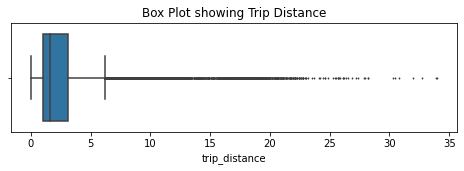

In [9]:
# Create box plot of trip_distance

plt.figure(figsize = (8,2))

sns.boxplot(x=df['trip_distance'],
           showfliers = True,
           fliersize=1)

plt.title("Box Plot showing Trip Distance")

plt.show()

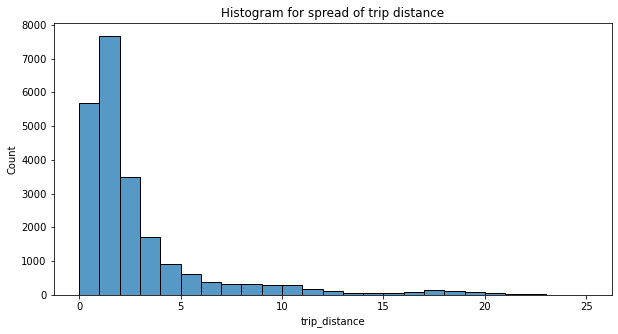

In [10]:
# Create histogram of trip_distance

plt.figure(figsize=(10,5))

sns.histplot(df['trip_distance'],bins=range(0,26,1))

plt.title("Histogram for spread of trip distance")

plt.show()

**total amount**

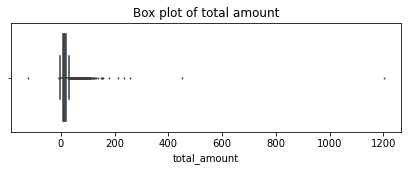

In [11]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))

sns.boxplot(df['total_amount'],
           showfliers=True,
           fliersize=1)

plt.title("Box plot of total amount")

plt.show()

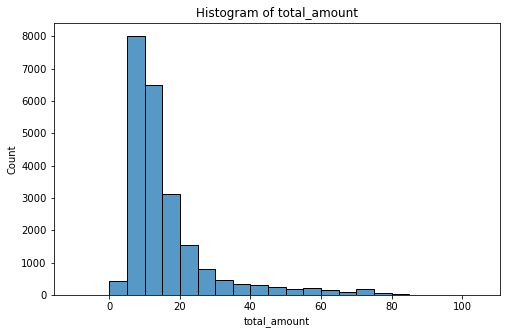

In [12]:
# Create histogram of total_amount

plt.figure(figsize=(8,5))

sns.histplot(df['total_amount'], bins=range(-10,110,5))

plt.title("Histogram of total_amount")

plt.show()

**tip amount**

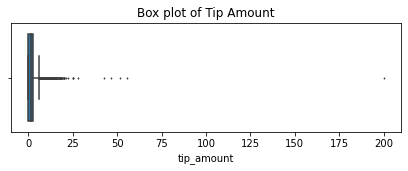

In [13]:
# Create box plot of tip_amount

plt.figure(figsize=(7,2))

sns.boxplot(df['tip_amount'],fliersize=1, showfliers = True)

plt.title("Box plot of Tip Amount")

plt.show()

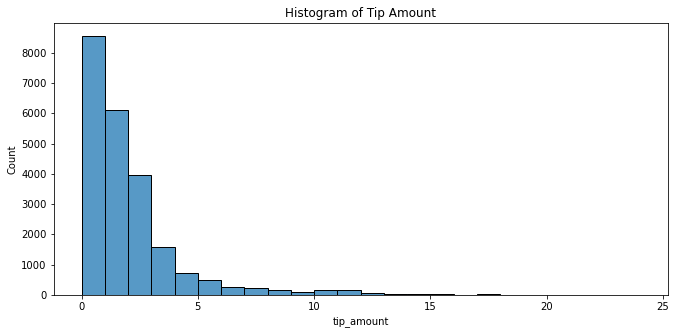

In [14]:
# Create histogram of tip_amount

plt.figure(figsize=(11,5))

sns.histplot(df['tip_amount'], bins=range(0,25,1))

plt.title('Histogram of Tip Amount')

plt.show()

**tip_amount by vendor**

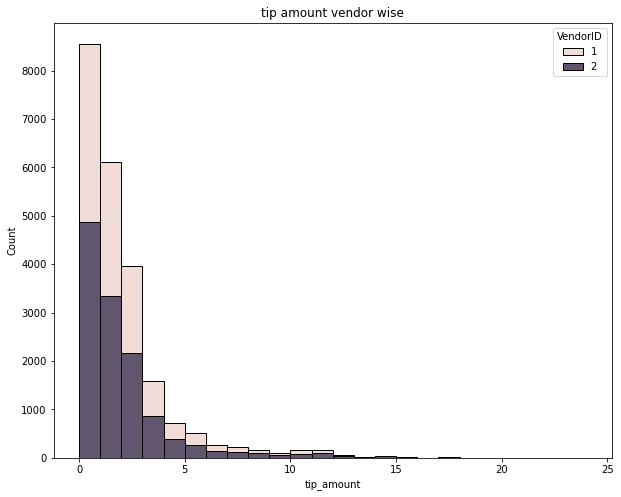

In [15]:
# Create histogram of tip_amount by vendor

plt.figure(figsize=(10,8))

sns.histplot(x=df['tip_amount'],
            bins=range(0,25,1),
            hue=df['VendorID'],
            multiple='stack')

plt.title("tip amount vendor wise")

plt.show()

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

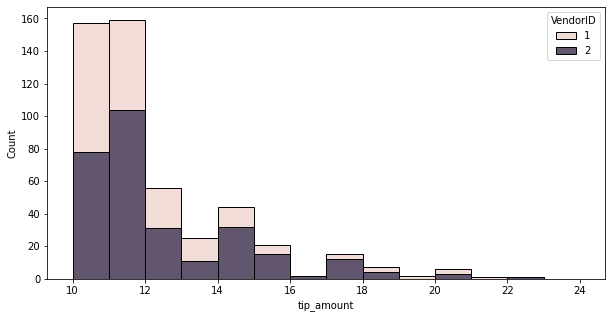

In [16]:
# Create histogram of tip_amount by vendor for tips > $10 

plt.figure(figsize=(10,5))

tip_over_10 = df[df['tip_amount']>10]

graph=sns.histplot(data=tip_over_10,x=df['tip_amount'],
            bins=range(10,25,1),
            hue = df['VendorID'],
            multiple='stack')

plt.show()

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [17]:
df['passenger_count'].value_counts().reset_index()

,index,passenger_count
0,1,16117
1,2,3305
2,5,1143
3,3,953
4,6,693
5,4,455
6,0,33


In [18]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby(['passenger_count'])[['tip_amount']].mean().reset_index()

mean_tips_by_passenger_count

,passenger_count,tip_amount
0,0,2.135758
1,1,1.848920
2,2,1.856378
3,3,1.716768
4,4,1.530264
5,5,1.873185
6,6,1.720260


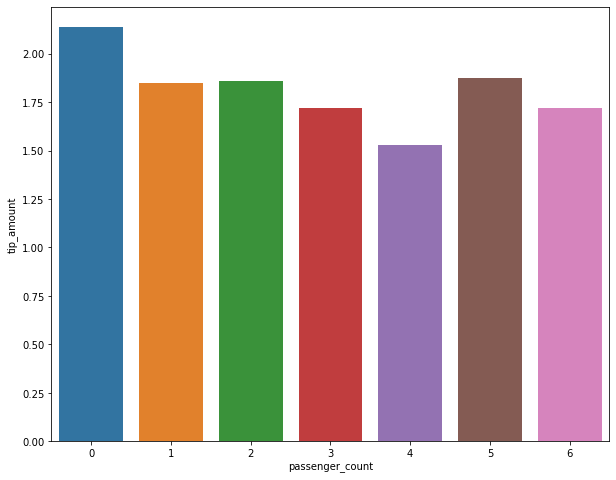

In [19]:
# Create bar plot for mean tips by passenger count
plt.figure(figsize = (10,8))

sns.barplot( data = mean_tips_by_passenger_count,
           x = 'passenger_count',
           y = 'tip_amount')

plt.show()


**Create month and day columns**

In [20]:
# Create a month column

df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Create a day column

df['day'] = df['tpep_pickup_datetime'].dt.day_name()

**Plot total ride count by month**

Begin by calculating total ride count by month.

In [21]:
# Get total number of rides for each month

rides_per_month = df['month'].value_counts()

rides_per_month

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

In [22]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

rides_per_month = rides_per_month.reindex(index=month_order)

rides_per_month

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

In [23]:
# Show the index
rides_per_month.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

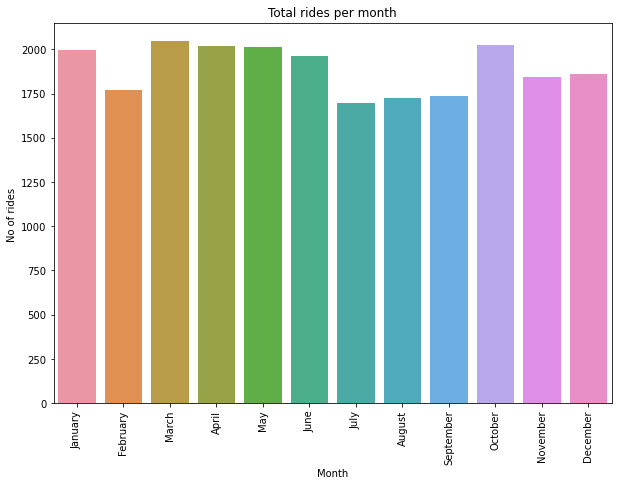

In [24]:
# Create a bar plot of total rides per month

plt.figure(figsize = (10,7))

sns.barplot(x=rides_per_month.index,
           y=rides_per_month)

plt.xlabel("Month")

plt.ylabel("No of rides ")

plt.xticks(rotation = 90)

plt.title("Total rides per month")

plt.show()

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [25]:
# Repeat the above process, this time for rides by day

rides_per_day = df['day'].value_counts()

rides_per_day

Friday       3413
Thursday     3402
Wednesday    3390
Saturday     3367
Tuesday      3198
Sunday       2998
Monday       2931
Name: day, dtype: int64

In [26]:
#Sorting days

weekday_order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']

rides_per_day = rides_per_day.reindex(index=weekday_order)

rides_per_day

Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

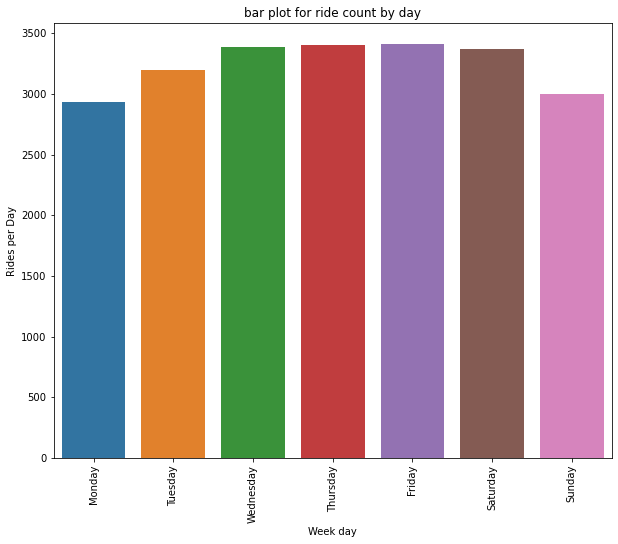

In [27]:
# Create bar plot for ride count by day

plt.figure(figsize= (10,8))

sns.barplot(x = rides_per_day.index,
           y = rides_per_day)

plt.xlabel("Week day")

plt.ylabel("Rides per Day")

plt.xticks(rotation=90)

plt.title("bar plot for ride count by day")

plt.show()

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [28]:
# Repeat the process, this time for total revenue by day
total_amount_daywise = df.groupby(['day'])['total_amount'].sum()

total_amount_daywise = total_amount_daywise.reindex(index = weekday_order)

total_amount_daywise

day
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Sunday       48624.06
Name: total_amount, dtype: float64

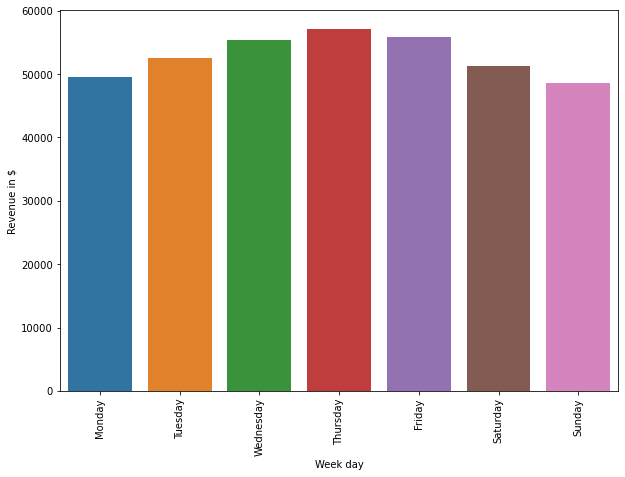

In [29]:
# Create bar plot of total revenue by day

plt.figure(figsize = (10,7))

trd = sns.barplot(x = total_amount_daywise.index,
                 y = total_amount_daywise)
plt.xlabel("Week day")
plt.ylabel("Revenue in $")

plt.xticks(rotation=90)

plt.show()

**Plot total revenue by month**

In [30]:
# Repeat the process, this time for total revenue by month

total_revenue_month = df.groupby(['month'])['total_amount'].sum()

total_revenue_month = total_revenue_month.reindex(index=month_order)

total_revenue_month

month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64

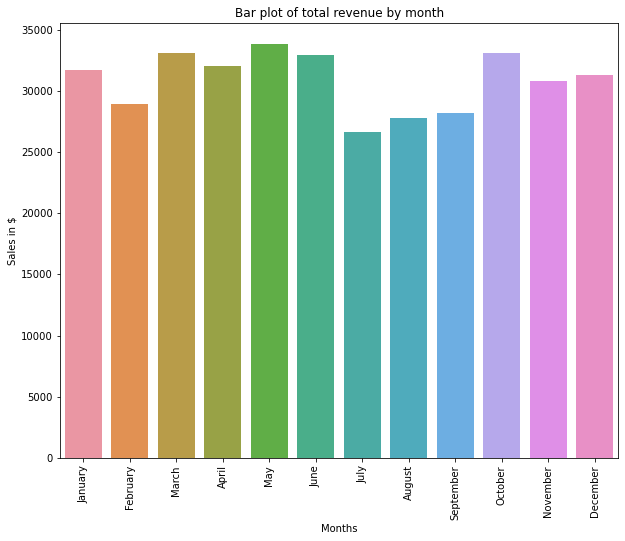

In [31]:
# Create a bar plot of total revenue by month

plt.figure(figsize=(10,8))

trm = sns.barplot(x = total_revenue_month.index,
                 y = total_revenue_month)

plt.title("Bar plot of total revenue by month")

plt.xlabel('Months')
plt.ylabel('Sales in $')

plt.xticks(rotation=90)

plt.show()

#### Scatter plot

You can create a scatterplot in Tableau Public, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the following link. Those instructions create a scatterplot showing the relationship between total_amount and trip_distance. Consider adding the Tableau visualization to your executive summary, and adding key insights from your findings on those two variables.

[Tableau visualization guidelines](https://docs.google.com/document/d/1pcfUlttD2Y_a9A4VrKPzikZWCAfFLsBAhuKuomjcUjA/template/preview)

**Plot mean trip distance by drop-off location**

In [32]:
# Get number of unique drop-off location IDs
drop_off_location = sorted(df['DOLocationID'].unique())

print(len(drop_off_location))

216


In [33]:
# Calculate the mean trip distance for each drop-off location
# Sort the results in descending order by mean trip distance


mean_trip_distance_per_location = df.groupby(['DOLocationID'])[['trip_distance']].mean().sort_values(by='trip_distance', ascending=False)


mean_trip_distance_per_location

,trip_distance
DOLocationID,
23,24.275000
29,21.650000
210,20.500000
11,17.945000
51,17.310000
...,...
137,1.818852
234,1.727806
237,1.555494


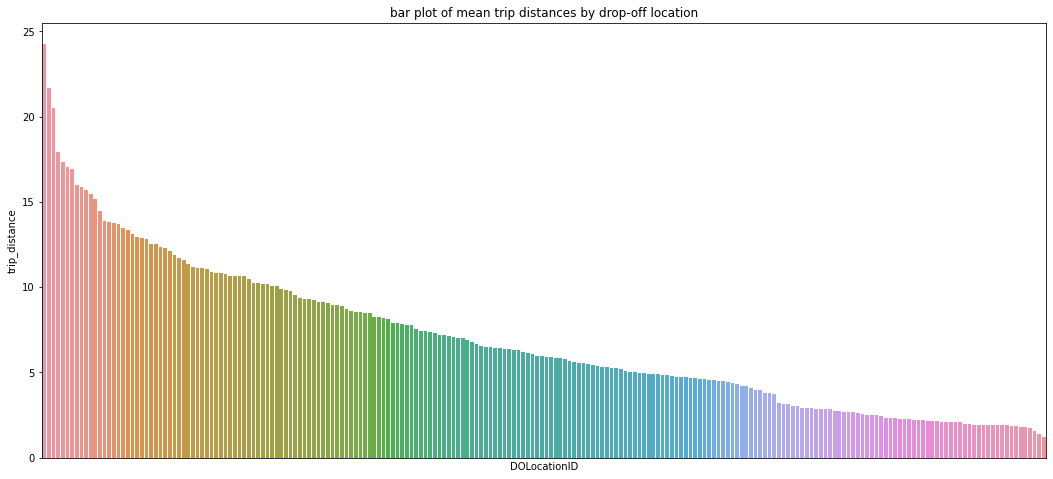

In [41]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance


plt.figure(figsize=(18,8))

drp = sns.barplot(x=mean_trip_distance_per_location.index,
                 y= mean_trip_distance_per_location['trip_distance'],
                 order = mean_trip_distance_per_location.index)

plt.title("bar plot of mean trip distances by drop-off location")

plt.xticks([])

plt.show()
